In [1]:
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.formula.api as smf # predictive modeling with nice outputs
import statistics as stat
from scipy.stats import kurtosis # for kurtosis
from scipy.stats import skew # for skewness

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './__datasets/birthweight_low.xlsx'


# reading the file into Python
birthweight_low = pd.read_excel(io = file)


# outputting the first ten rows of the dataset
birthweight_low.head(n=10)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,23,11.0,4,11.0,46,12.0,8,9,13,4,0,0,0,1,0,1,0,3600
1,23,16.0,3,10.0,50,12.0,3,8,1,1,1,0,1,0,0,1,0,3912
2,24,16.0,1,12.0,26,16.0,6,9,21,4,0,0,0,1,0,0,1,3090
3,25,14.0,3,12.0,33,12.0,9,9,12,7,1,0,1,0,0,1,0,3370
4,25,12.0,2,8.0,32,12.0,9,9,4,3,0,0,1,0,0,1,0,3827
5,26,12.0,1,10.0,24,12.0,8,9,6,8,1,0,0,1,0,0,1,2778
6,26,13.0,7,11.0,42,NaN,9,9,2,4,1,0,1,0,1,0,0,3170
7,26,11.0,1,12.0,44,12.0,9,9,10,4,1,0,1,0,0,1,0,3310
8,26,16.0,2,10.0,24,16.0,9,9,11,4,1,0,1,0,0,1,0,3730
9,26,12.0,1,12.0,32,12.0,9,9,6,0,1,0,1,0,0,1,0,3912


In [2]:
# INFOrmation about each variable
birthweight_low.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    352 non-null    int64  
 1   meduc   349 non-null    float64
 2   monpre  352 non-null    int64  
 3   npvis   349 non-null    float64
 4   fage    352 non-null    int64  
 5   feduc   345 non-null    float64
 6   omaps   352 non-null    int64  
 7   fmaps   352 non-null    int64  
 8   cigs    352 non-null    int64  
 9   drink   352 non-null    int64  
 10  male    352 non-null    int64  
 11  mwhte   352 non-null    int64  
 12  mblck   352 non-null    int64  
 13  moth    352 non-null    int64  
 14  fwhte   352 non-null    int64  
 15  fblck   352 non-null    int64  
 16  foth    352 non-null    int64  
 17  bwght   352 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 49.6 KB


In [3]:
# Since omaps and fmaps describe overall health condition of a baby after birth, it does not provide any insight on birth weight
# Removing omaps and fmaps from dataframe
birthweight_low.drop(birthweight_low.columns[[6, 7]], axis = 1, inplace = True)
birthweight_low=pd.DataFrame(birthweight_low)

In [4]:
# Creating temporary dataframe to drop observations with missing values
bw_low=birthweight_low.dropna()

# Calculating median for features meduc, npvis, feduc
median_meduc=stat.median(bw_low['meduc'])
median_npvis=stat.median(bw_low['npvis'])
median_feduc=stat.median(bw_low['feduc'])

# Imputing missing values with median for above mentioned three features
birthweight_low["meduc"]=birthweight_low["meduc"].fillna(median_meduc)
birthweight_low["npvis"]=birthweight_low["npvis"].fillna(median_npvis)
birthweight_low["feduc"]=birthweight_low["feduc"].fillna(median_feduc)
birthweight_low.info()

# making sure all missing values have been taken care of
birthweight_low.isnull().any().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    352 non-null    int64  
 1   meduc   352 non-null    float64
 2   monpre  352 non-null    int64  
 3   npvis   352 non-null    float64
 4   fage    352 non-null    int64  
 5   feduc   352 non-null    float64
 6   cigs    352 non-null    int64  
 7   drink   352 non-null    int64  
 8   male    352 non-null    int64  
 9   mwhte   352 non-null    int64  
 10  mblck   352 non-null    int64  
 11  moth    352 non-null    int64  
 12  fwhte   352 non-null    int64  
 13  fblck   352 non-null    int64  
 14  foth    352 non-null    int64  
 15  bwght   352 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 44.1 KB


False

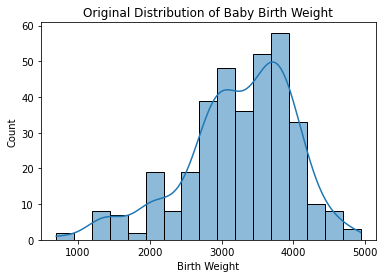

count     352.000000
mean     3246.088068
std       757.704391
min       697.000000
25%      2867.750000
50%      3349.000000
75%      3778.750000
max      4933.000000
Name: bwght, dtype: float64

Skewness: -0.7674054697100995
Kurtosis:     0.555236972553343

Negatively skewed


In [5]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight_low,
             x      = 'bwght',
             kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Baby Birth Weight")
plt.xlabel(xlabel = "Birth Weight") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram to identify whether it is skewed or not.
plt.show()


skewness=skew(birthweight_low['bwght'], bias=False)
kurt=kurtosis(birthweight_low['bwght'], bias=False)

# formatting and printing the descriptive statistics of bwght feature

print(birthweight_low['bwght'].describe())
print(f"""
Skewness: {skewness}
Kurtosis:     {kurt}
""")
if skewness < 0:
    print("Negatively skewed")
elif skewness > 0:
    print("Positively skewed")
else:
    print("No skewness - normal distribution")

In [6]:
#Fixing skewness

# log transforming variables and saving it to dataframe
birthweight_low['log_mage'] = np.log(birthweight_low['mage']+ 0.001) # log for mage
birthweight_low['log_meduc'] = np.log(birthweight_low['meduc']+ 0.001) # log for meduc
birthweight_low['log_monpre'] = np.log(birthweight_low['monpre']+ 0.001) # log for monpre
birthweight_low['log_npvis'] = np.log(birthweight_low['npvis']+ 0.001) # log for npvis
birthweight_low['log_fage'] = np.log(birthweight_low['fage']+ 0.001) # log for fage
birthweight_low['log_feduc'] = np.log(birthweight_low['feduc']+ 0.001) # log for feduc
birthweight_low['log_cigs'] = np.log(birthweight_low['cigs']+ 0.001) # log for feduc
birthweight_low['log_drink'] = np.log(birthweight_low['drink']+ 0.001) # log for feduc
birthweight_low['log_bwght'] = np.log(birthweight_low['bwght']+ 0.001) # log for bwght
birthweight_low['page'] = (birthweight_low['fage']+ birthweight_low['mage'])/2 # average age of parents
birthweight_low['log_page'] = np.log(birthweight_low['page']) #log average age of parents
birthweight_low['pwhte'] = (birthweight_low['mwhte']+ birthweight_low['fwhte'])/2 # parents are white
birthweight_low['pblck'] = (birthweight_low['mblck']+ birthweight_low['fblck'])/2 # parents are black
birthweight_low['poth'] = (birthweight_low['moth']+ birthweight_low['foth'])/2 # parents are other
birthweight_low['log_drink'] = np.log(birthweight_low['drink']+ 0.001) # log for drink 
birthweight_low['peduc'] = (birthweight_low['meduc']+ birthweight_low['feduc'])/2 # parents' average education
birthweight_low['log_peduc'] = np.log(birthweight_low['peduc']+ 0.001) # log for parents' average education
birthweight_low['bad_habit'] = (birthweight_low['drink'] + birthweight_low['cigs'])* (birthweight_low['mage']) # combining mother's drink and cigs features as a bad habit
birthweight_low['baby_care'] = (10-birthweight_low['monpre']) # number of months since care began
birthweight_low['log_baby_care'] = np.log(birthweight_low['baby_care']+ 0.001) # log for care

In [7]:
# For stats model

# Setting up more than one train-test split #

# FULL X-dataset (normal Y)
train, test= train_test_split(
            birthweight_low,
            test_size = 0.25,
            random_state = 219)

In [8]:
## Creating a clean data frame for Linear Regression 
ols_df = pd.DataFrame()
ols_df['bad_habit']=birthweight_low['bad_habit']
ols_df['log_baby_care']=birthweight_low['log_baby_care']
ols_df['log_npvis']=birthweight_low['log_npvis']
ols_df['fage']=birthweight_low['fage']
ols_df['log_peduc']=birthweight_low['log_peduc']
ols_df['pwhte']=birthweight_low['pwhte']
ols_df['pblck']=birthweight_low['pblck']
ols_df['moth']=birthweight_low['moth']
ols_df['foth']=birthweight_low['foth']
ols_df['log_bwght']=birthweight_low['log_bwght']

ols_df.head()

,bad_habit,log_baby_care,log_npvis,fage,log_peduc,pwhte,pblck,moth,foth,log_bwght
0,391,1.791926,2.397986,46,2.442434,0.0,0.5,1,0,8.188689
1,46,1.946053,2.302685,50,2.639129,0.0,1.0,0,0,8.271804
2,600,2.197336,2.484990,26,2.772651,0.0,0.0,1,1,8.035927
3,475,1.946053,2.484990,33,2.565026,0.0,1.0,0,0,8.122668
4,175,2.079567,2.079567,32,2.484990,0.0,1.0,0,0,8.249837


In [9]:
lm_best = smf.ols(formula =  """
                                log_bwght ~ bad_habit +
                                            log_baby_care +
                                            log_npvis +
                                            fage +
                                            log_peduc +
                                            pwhte +
                                            pblck +
                                            moth +
                                            foth 
                             """,
                                data = train)

# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_bwght   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     61.41
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           3.62e-55
Time:                        10:01:39   Log-Likelihood:                 99.250
No. Observations:                 264   AIC:                            -180.5
Df Residuals:                     255   BIC:                            -148.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.0625      0.512     11.830

In [10]:
lm_best = smf.ols(formula =  """
                                log_bwght ~ bad_habit +
                                            log_baby_care +
                                            log_npvis +
                                            fage +
                                            log_peduc +
                                            pwhte +
                                            pblck +
                                            moth +
                                            foth 
                             """,
                                data = test)

# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_bwght   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     29.66
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           8.27e-21
Time:                        10:01:53   Log-Likelihood:                 43.149
No. Observations:                  88   AIC:                            -68.30
Df Residuals:                      79   BIC:                            -46.00
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.5489      0.261     21.239

In [11]:
# Spliting cus_data_dummies dataset

# preparing explanatory variable data --- (x data)
labelled_data   = ols_df.drop(['log_bwght'],
                               axis = 1)

# preparing response variables -- (y data)
label_target = ols_df.loc[ : , 'log_bwght'] 


# creating the testing and training dataset
X_train, X_test, y_train, y_test = train_test_split(
    labelled_data,
    label_target,
    test_size = 0.25, 
    random_state = 219)

# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {X_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {X_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (264, 9)
y-side: (264,)


Testing Data
------------
X-side: (88, 9)
y-side: (88,)



In [12]:
# INSTANTIATING a model object
lr = LinearRegression()
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(X_train, y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(X_test)


# SCORING the results
print(f'OLS Training Score : {lr.score(X_train, y_train).round(4)}')
print(f'OLS Testing Score  : {lr.score(X_test, y_test).round(4)}')


# saving scoring data for future use
lr_train_score = lr.score(X_train, y_train).round(4) # using R-square
lr_test_score  = lr.score(X_test, y_test).round(4)   # using R-square


# displaying and saving the gap between training and testing
print(f'OLS Train-Test Gap : {abs(lr_train_score - lr_test_score).round(4)}')
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.6583
OLS Testing Score  : 0.6906
OLS Train-Test Gap : 0.0323
